# Support Vector Machines
*Large margin classification*

SVMs are ML model for linear and non-linear classification, regression and outlier detection. This model maximizes the *margin* between classes - i.e. the distance between the closest instances (*support vectors*) that define the decision boundary.

## Linear SVM Classification

* *Hard margin classification* - all instances should be correctly classified, works only for *linearly separable* data, sensitive to outliers
* *Soft margin classification* - allows some degree of *margin violations*

In [1]:
# FIXME: meke autocompletion working again
%config Completer.use_jedi = False

import numpy as np

from sklearn.svm import SVC
from sklearn import datasets

np.random.seed(42)

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

# SVM Classifier model
svm_clf = SVC(kernel="linear", C=float("inf"))
svm_clf.fit(X, y)

SVC(C=inf, kernel='linear')

### Bad Models

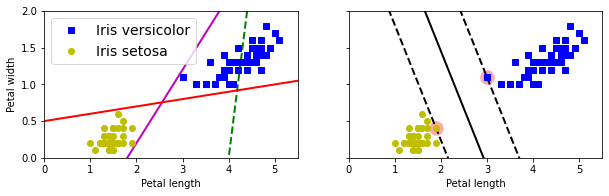

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

def plot_svc_decision_boundary(svm_clf, x_min, x_max):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]
    
    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(x_min, x_max, 200)
    decision_boundary = -w[0] / w[1] * x0 - b / w[1]

    margin = 1 / w[1]
    margin_pos = decision_boundary + margin
    margin_neg = decision_boundary - margin
    
    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors="#FFAAAA")
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, margin_pos, "k--", linewidth=2)
    plt.plot(x0, margin_neg, "k--", linewidth=2)


# Bad models
x0 = np.linspace(0, 5.5, 200)
pred_1 = 5*x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5


fig, axes = plt.subplots(ncols=2, figsize=(10, 2.7), sharey=True)

# Bad decision boundary
plt.sca(axes[0])
plt.plot(x0, pred_1, "g--", linewidth=2)
plt.plot(x0, pred_2, "m-", linewidth=2)
plt.plot(x0, pred_3, "r-", linewidth=2)
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], "bs", label="Iris versicolor")
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], "yo", label="Iris setosa")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 5.5, 0, 2])

# Better decision boundary
plt.sca(axes[1])
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], "bs", label="Iris versicolor ")
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], "yo", label="Iris setosa")
plt.xlabel("Petal length")
plt.axis([0, 5.5, 0, 2])

plt.show()

### Sensitivity to feature scales

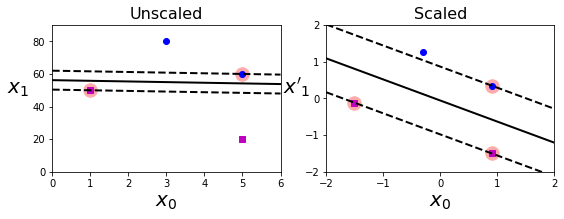

In [3]:
from sklearn.preprocessing import StandardScaler

Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])

# unscaled
svm_clf = SVC(kernel='linear', C=100)
svm_clf.fit(Xs, ys)

plt.figure(figsize=(9, 2.7))

# plot unscaled
plt.subplot(121)
plt.plot(Xs[:, 0][ys == 1], Xs[:, 1][ys == 1], "bo")
plt.plot(Xs[:, 0][ys == 0], Xs[:, 1][ys == 0], "ms")
plot_svc_decision_boundary(svm_clf, 0, 6)
plt.xlabel("$x_0$", fontsize=20)
plt.ylabel("$x_1$    ", fontsize=20, rotation=0)
plt.title("Unscaled", fontsize=16)
plt.axis([0, 6, 0, 90])

# scaled
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xs)
svm_clf.fit(X_scaled, ys)

# plot scaled
plt.subplot(122)
plt.plot(X_scaled[:, 0][ys == 1], X_scaled[:, 1][ys == 1], "bo")
plt.plot(X_scaled[:, 0][ys == 0], X_scaled[:, 1][ys == 0], "ms")
plot_svc_decision_boundary(svm_clf, -2, 2)
plt.xlabel("$x_0$", fontsize=20)
plt.ylabel("$x'_1$  ", fontsize=20, rotation=0)
plt.title("Scaled", fontsize=16)
plt.axis([-2, 2, -2, 2])

plt.show()

### Sensitivity to outliers

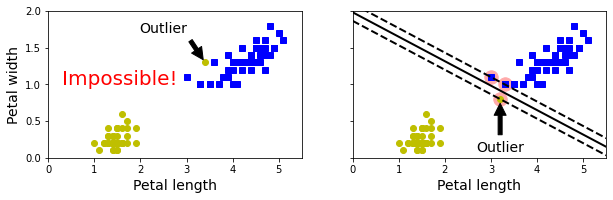

In [4]:
X_outliers = np.array([[3.4, 1.3], [3.2, 0.8]])
y_outliers = np.array([0, 0])

Xo1 = np.concatenate([X, X_outliers[:1]], axis=0)
yo1 = np.concatenate([y, y_outliers[:1]], axis=0)
Xo2 = np.concatenate([X, X_outliers[1:]], axis=0)
yo2 = np.concatenate([y, y_outliers[1:]], axis=0)

svm_clf2 = SVC(kernel="linear", C=10**9)
svm_clf2.fit(Xo2, yo2)

fig, axes = plt.subplots(ncols=2, figsize=(10, 2.7), sharey=True)

# Impossible for hard margin classification
plt.sca(axes[0])
plt.plot(Xo1[:, 0][yo1 == 1], Xo1[:, 1][yo1 == 1], "bs")
plt.plot(Xo1[:, 0][yo1 == 0], Xo1[:, 1][yo1 == 0], "yo")
plt.text(0.3, 1.0, "Impossible!", fontsize=20, color="red")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.annotate(
    "Outlier",
    xy=(X_outliers[0][0], X_outliers[0][1]),
    xytext=(2.5, 1.7),
    ha="center",
    arrowprops=dict(facecolor='black', shrink=0.1),
    fontsize=14,
)
plt.axis([0, 5.5, 0, 2])

# Outlier pushes the decision boundary too close to one class (poor generalization)
plt.sca(axes[1])
plt.plot(Xo2[:, 0][yo2==1], Xo2[:, 1][yo2==1], "bs")
plt.plot(Xo2[:, 0][yo2==0], Xo2[:, 1][yo2==0], "yo")
plot_svc_decision_boundary(svm_clf2, 0, 5.5)
plt.xlabel("Petal length", fontsize=14)
plt.annotate(
    "Outlier",
    xy=(X_outliers[1][0], X_outliers[1][1]),
    xytext=(3.2, 0.08),
    ha="center",
    arrowprops=dict(facecolor='black', shrink=0.1),
    fontsize=14,
)
plt.axis([0, 5.5, 0, 2])

plt.show()

### Large margin vs margin violations

In [5]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.float64)  # Iris virginica

# equivalent to `SVC(kernel="linear", C=1)` or `SGDClassifier(loss="hinge", alpha=1/(m*C))`
svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("lin_svc", LinearSVC(C=1, loss="hinge")),
])

svm_clf.fit(X, y)

svm_clf.predict([[5.5, 1.7]])

array([1.])

## Nonlinear SVM Classification
One option to tackle non-linearly separable datasets is to add extra non-linear features, for instance polynomial features.

/home/matyama/.cache/pypoetry/virtualenvs/homl-lPHrmr2i-py3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


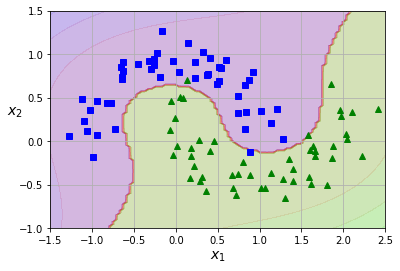

In [6]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], "bs")
    plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], "g^")
    plt.axis(axes)
    plt.grid(True, which="both")
    plt.xlabel(r"$x_1$", fontsize=14)
    plt.ylabel(r"$x_2$", fontsize=14, rotation=0)

    
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

# Moons dataset
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

# plot axes
axes = [-1.5, 2.5, -1, 1.5]

# Linear SVM classifier with polynomial features and feature scaling
polynomial_svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C=10, loss="hinge", random_state=42))
])

polynomial_svm_clf.fit(X, y)

plot_predictions(polynomial_svm_clf, axes)
plot_dataset(X, y, axes)
plt.show()

### Polynomial Kernel

In [7]:
poly_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
])

poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

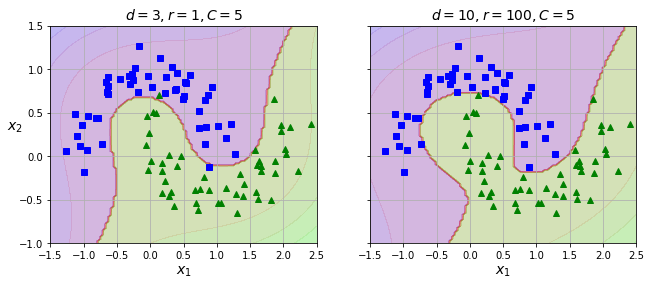

In [8]:
poly100_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5))
])

poly100_kernel_svm_clf.fit(X, y)

fig, fig_axes = plt.subplots(ncols=2, figsize=(10.5, 4), sharey=True)

plt.sca(fig_axes[0])
plot_predictions(poly_kernel_svm_clf, axes)
plot_dataset(X, y, axes)
plt.title(r"$d=3, r=1, C=5$", fontsize=14)

plt.sca(fig_axes[1])
plot_predictions(poly100_kernel_svm_clf, axes)
plot_dataset(X, y, axes)
plt.title(r"$d=10, r=100, C=5$", fontsize=14)
plt.ylabel("")

plt.show()

### Similarity Features
Another approach to non-linear datasets is to add features using a *similarity function* which measures how much each instance resembles particular *landmark*.

But how to create landmarks? Simplest approach is to create a landmark at every single data point. 
* This creates many extra dimensions which greatly increases the chanses that transformed dataset will be linearly separable
* On the other hand, a dataset with $m$ instances of $n$ features will be transformed into a datase with $m$ instances and $n + m$ features

### Radial Basis Function
**Gaussian Radial Basis Function (RBF)** is a similarity function parametrized by $\gamma$ defined as $\phi_\gamma(\mathbf{x}, \ell) = \exp(-\gamma \| \mathbf{x} - \ell \|)$ where $\ell$ is a landmark.

Increasing $\gamma$ makes the bell-shaped curve narrower which makes each instance's influence smaller and the decision boundary more irregular. Conversly, decreasing this parameter makes the decision boundary smoother.

In [9]:
rbf_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
])

rbf_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

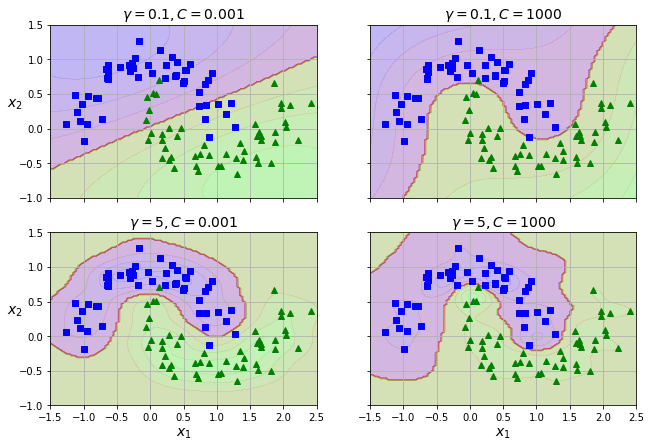

In [10]:
def fit_svc(X, y, **kwargs):
    rbf_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", **kwargs))
    ])
    rbf_kernel_svm_clf.fit(X, y)
    return rbf_kernel_svm_clf

hyperparams = [
    dict(gamma=0.1, C=0.001),
    dict(gamma=0.1, C=1000),
    dict(gamma=5, C=0.001),
    dict(gamma=5, C=1000),
]

svm_clfs = [fit_svc(X, y, **params) for params in hyperparams]

fig, fit_axes = plt.subplots(nrows=2, ncols=2, figsize=(10.5, 7), sharex=True, sharey=True)

for i, svm_clf in enumerate(svm_clfs):
    plt.sca(fit_axes[i // 2, i % 2])
    plot_predictions(svm_clf, axes)
    plot_dataset(X, y, axes)
    plt.title("$\gamma = {}, C = {}$".format(svm_clf["svm_clf"].gamma, svm_clf["svm_clf"].C), fontsize=14)
    if i in (0, 1):
        plt.xlabel("")
    if i in (1, 3):
        plt.ylabel("")

plt.show()

### Computational Complexity
| Class           | Time complexity                                            | Out-of-core support | Scaling required | Kernel trick |
|-----------------|------------------------------------------------------------|---------------------|------------------|--------------|
| `LinearSVC`     | $\mathcal{O}(m \times n)$                                  | No                  | Yes              | No           |
| `SGDClassifier` | $\mathcal{O}(m \times n)$                                  | Yes                 | Yes              | No           |
| `SVC`           | $\mathcal{O}(m^2 \times n)$ to $\mathcal{O}(m^3 \times n)$ | No                  | Yes              | Yes          |

## SVM Regression
SVM also supports (non-)linear regression. The trict is to reverse the objective: *Instead of trying to fit the largest possible street between classes while limiting margin violations, fit as many instances possible on the street while minizing off the street instances.*

The "width of the street" is controlled by hyperparameter $\epsilon$. Adding more instances within the margin does not affect the model's predictions. Thus the model is said to be $\epsilon$*-sensitive*.

In [11]:
from sklearn.svm import LinearSVR

np.random.seed(42)

# Some noisy linear data
m = 50
X = 2 * np.random.rand(m, 1)
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()

# Linear SVM regression 
svm_reg = LinearSVR(epsilon=1.5, random_state=42)
svm_reg.fit(X, y)

LinearSVR(epsilon=1.5, random_state=42)

### Linear SVM Regression

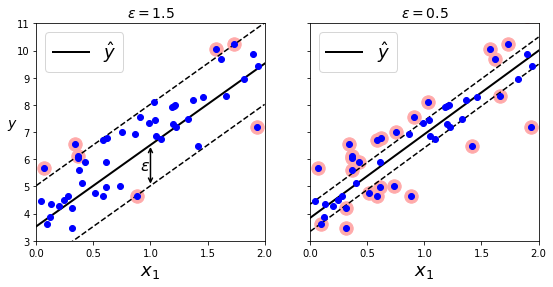

In [12]:
def find_support_vectors(svm_reg, X, y):
    y_pred = svm_reg.predict(X)
    off_margin = (np.abs(y - y_pred) >= svm_reg.epsilon)
    return np.argwhere(off_margin)

svm_reg1 = LinearSVR(epsilon=1.5, random_state=42)
svm_reg1.fit(X, y)
svm_reg1.support_ = find_support_vectors(svm_reg1, X, y)

svm_reg2 = LinearSVR(epsilon=0.5, random_state=42)
svm_reg2.fit(X, y)
svm_reg2.support_ = find_support_vectors(svm_reg2, X, y)

eps_x1 = 1
eps_y_pred = svm_reg1.predict([[eps_x1]])

def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$")
    plt.plot(x1s, y_pred + svm_reg.epsilon, "k--")
    plt.plot(x1s, y_pred - svm_reg.epsilon, "k--")
    plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA')
    plt.plot(X, y, "bo")
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.legend(loc="upper left", fontsize=18)
    plt.axis(axes)
    
fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)

plt.sca(axes[0])
plot_svm_regression(svm_reg1, X, y, [0, 2, 3, 11])
plt.title("$\epsilon = {}$".format(svm_reg1.epsilon), fontsize=14)
plt.ylabel("$y$", fontsize=14, rotation=0)
plt.annotate(
    '',
    xy=(eps_x1, eps_y_pred), xycoords='data', xytext=(eps_x1, eps_y_pred - svm_reg1.epsilon),
    textcoords='data',
    arrowprops={'arrowstyle': '<->', 'linewidth': 1.5},
)
plt.text(0.91, 5.6, "$\epsilon$", fontsize=16)


plt.sca(axes[1])
plot_svm_regression(svm_reg2, X, y, [0, 2, 3, 11])
plt.title("$\epsilon = {}$".format(svm_reg2.epsilon), fontsize=14)

plt.show()

### Nonlinear SVM Regression

In [13]:
from sklearn.svm import SVR

np.random.seed(42)

# Some noisy non-linear data
m = 100
X = 2 * np.random.rand(m, 1) - 1
y = (0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(m, 1)/10).ravel()

svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1, gamma="scale")
svm_poly_reg.fit(X, y)

SVR(C=100, degree=2, kernel='poly')

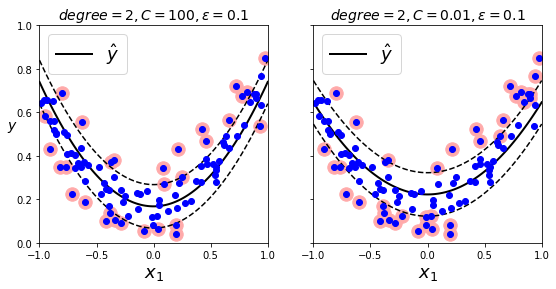

In [14]:
svm_poly_reg1 = SVR(kernel="poly", degree=2, C=100, epsilon=0.1, gamma="scale")
svm_poly_reg1.fit(X, y)

svm_poly_reg2 = SVR(kernel="poly", degree=2, C=0.01, epsilon=0.1, gamma="scale")
svm_poly_reg2.fit(X, y)

fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)

plt.sca(axes[0])
plot_svm_regression(svm_poly_reg1, X, y, [-1, 1, 0, 1])
plt.title("$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg1.degree, svm_poly_reg1.C, svm_poly_reg1.epsilon), fontsize=14)
plt.ylabel("$y$", fontsize=14, rotation=0)

plt.sca(axes[1])
plot_svm_regression(svm_poly_reg2, X, y, [-1, 1, 0, 1])
plt.title("$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg2.degree, svm_poly_reg2.C, svm_poly_reg2.epsilon), fontsize=14)

plt.show()

## Under the Hood

### Online SVMs
One option is to use SGD which minimizes $J(\mathbf{x}, b) = \frac{1}{2} \mathbf{w}^T \mathbf{w} + C \sum_{i = 1}^m \max(0, 1 - t^{(i)}(\mathbf{w}^T \mathbf{x}^{(i)} + b))$.

Online kernelized SVMs also exist.

#### Hinge Loss
*Hinge Loss* is defined as $L_{\text{Hinge}}(t) = \max(0, 1 - t)$.

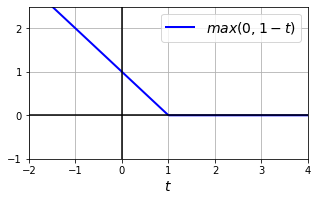

In [15]:
t = np.linspace(-2, 4, 200)
h = np.where(1 - t < 0, 0, 1 - t)  # max(0, 1-t)

plt.figure(figsize=(5, 2.8))
plt.plot(t, h, "b-", linewidth=2, label="$max(0, 1 - t)$")
plt.grid(True, which="both")
plt.axhline(y=0, color="k")
plt.axvline(x=0, color="k")
plt.yticks(np.arange(-1, 2.5, 1))
plt.xlabel("$t$", fontsize=14)
plt.axis([-2, 4, -1, 2.5])
plt.legend(loc="upper right", fontsize=14)
plt.show()

## Exercises

### Various SVM models on linearly separable dataset

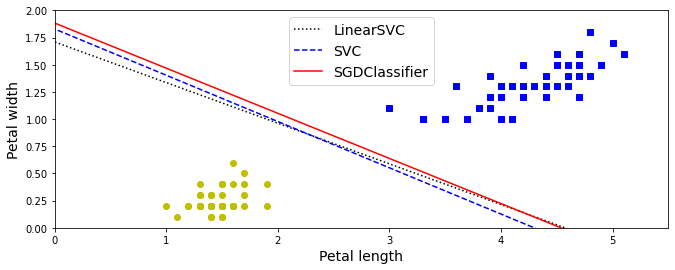

In [16]:
from sklearn.linear_model import SGDClassifier

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

# Iris Setosa and Iris Versicolor classes are linearly separable
setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

C = 5

lin_clf = LinearSVC(loss="hinge", C=C, random_state=42)
svm_clf = SVC(kernel="linear", C=C)
sgd_clf = SGDClassifier(
    loss="hinge",
    learning_rate="constant",
    eta0=0.001,
    alpha=1/(C * len(X)),
    max_iter=1000,
    tol=1e-3,
    random_state=42,
)

clfs = (lin_clf, svm_clf, sgd_clf)
clfs_style = ("k:", "b--", "r-")

# Scale the input data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train the classifiers
for clf in clfs:
    clf.fit(X_scaled, y)
    
plt.figure(figsize=(11, 4))

# Plot the data
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], "bs") # label="Iris versicolor"
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], "yo") # label="Iris setosa"

# Plot decision boundaries for all classifiers
for clf, boundary_style in zip(clfs, clfs_style):
    # Compute the slope and bias of the decision boundary
    w = -clf.coef_[0, 0] / clf.coef_[0, 1]
    b = -clf.intercept_[0] / clf.coef_[0, 1]
    
    # Transform the decision boundary lines back to the original scale
    boundary = scaler.inverse_transform([[-10, -10 * w + b], [10, 10 * w + b]])
    
    # Plot the boundary
    plt.plot(boundary[:, 0], boundary[:, 1], boundary_style, label=clf.__class__.__name__)

# Style the figure
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper center", fontsize=14)
plt.axis([0, 5.5, 0, 2])
    
plt.show()

### MNIST SVM Classifier

In [17]:
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

mnist = fetch_openml('mnist_784', version=1, cache=True)

X = mnist["data"]
y = mnist["target"].astype(np.uint8)

X_train = X[:60000]
y_train = y[:60000]
X_test = X[60000:]
y_test = y[60000:]

# Scale the inputs
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float32))
X_test_scaled = scaler.transform(X_test.astype(np.float32))

In [18]:
# First let's try linear SVM
svm_clf = LinearSVC(random_state=42)
svm_clf.fit(X_train_scaled, y_train)

y_pred = svm_clf.predict(X_train)
accuracy_score(y_train, y_pred)

/home/matyama/.cache/pypoetry/virtualenvs/homl-lPHrmr2i-py3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.7967666666666666

In [19]:
param_distributions = {
    "gamma": reciprocal(0.001, 0.1),
    "C": uniform(1, 10),
}

# Train RBF SVM on just 1k instances
rnd_search_cv = RandomizedSearchCV(SVC(), param_distributions, n_iter=10, verbose=2, cv=3, n_jobs=-1)
rnd_search_cv.fit(X_train_scaled[:1000], y_train[:1000])

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f43b7e1c4c0>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f43a68a9220>},
                   verbose=2)

In [20]:
rnd_search_cv.best_score_

0.8629917342492194

In [21]:
# Train the best classifier on the whole training dataset
best_clf = rnd_search_cv.best_estimator_
best_clf.fit(X_train_scaled, y_train)

# Evaluate the best classifier on the training set
y_pred = best_clf.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

0.9947166666666667

In [22]:
# Evaluate the best classifier on the test set
y_pred = best_clf.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.9722

### SVM on California housing dataset

In [24]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVR


housing = fetch_california_housing()
X = housing["data"]
y = housing["target"]

# Split the datest to training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the inputs
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# First try linear SVM
svm_reg = LinearSVR(random_state=42)
svm_reg.fit(X_train_scaled, y_train)

# Evaluate the linear model on training set with RMSE
y_pred = svm_reg.predict(X_train_scaled)
mse = mean_squared_error(y_train, y_pred)
np.sqrt(mse)

/home/matyama/.cache/pypoetry/virtualenvs/homl-lPHrmr2i-py3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.9819256687727764

In [25]:
# Next RVF SVM regression

param_distributions = {
    "gamma": reciprocal(0.001, 0.1),
    "C": uniform(1, 10),
}

rnd_search_cv = RandomizedSearchCV(SVR(), param_distributions, n_iter=10, verbose=2, cv=3, random_state=42, n_jobs=-1)
rnd_search_cv.fit(X_train_scaled, y_train)

best_reg = rnd_search_cv.best_estimator_

# Evaluate the RBF SVM on the training set
y_pred = best_reg.predict(X_train_scaled)
mse = mean_squared_error(y_train, y_pred)
np.sqrt(mse)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


0.5727524770785356

In [26]:
# Finally, evaluate the best regression model on the test set
y_pred = best_reg.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
np.sqrt(mse)

0.592916838552874